In [1]:
import sys 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
h1 = pd.read_csv(r"heuristic1.csv")
print(list(h1.columns))
h2 = pd.read_csv(r"heuristic2.csv")
print(list(h2.columns))
h3 = pd.read_csv(r"heuristic3.csv")
print(list(h3.columns))
h4 = pd.read_csv(r"heuristic4.csv")
print(list(h4.columns))
h5 = pd.read_csv(r"heuristic5.csv")
print(list(h5.columns))

['filterFactor', 'frame_size', 'scale_factor', 'noise_coefficient', 'avg_relative_abs_err']
['filterFactor', 'frame_size', 'scale_factor', 'noise_coefficient', 'avg_relative_abs_err']
['filterFactor', 'frame_size', 'scale_factor', 'noise_coefficient', 'avg_relative_abs_err']
['filterFactor', 'frame_size', 'scale_factor', 'noise_coefficient', 'avg_relative_abs_err']
['filterFactor', 'frame_size', 'scale_factor', 'noise_coefficient', 'avg_relative_abs_err']


Text(0, 0.5, 'Average Error')

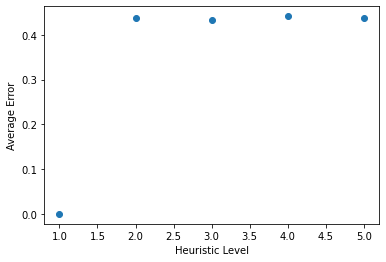

In [15]:
x = [1,2,3,4,5]
y = [np.mean(h1['avg_relative_abs_err']), np.mean(h2['avg_relative_abs_err']), np.mean(h3['avg_relative_abs_err']) ,np.mean(h4['avg_relative_abs_err']), np.mean(h5['avg_relative_abs_err'])]
plt.scatter(x,y)
plt.xlabel("Heuristic Level")
plt.ylabel("Average Error")

In [23]:
h1["Frame Size"] = np.absolute(h1["frame_size"])
h1["Scale Factor"] = np.absolute(h1["scale_factor"])
h1 = h1[h1["avg_relative_abs_err"] <= 0.1]

(98, 98)
(33, 33)


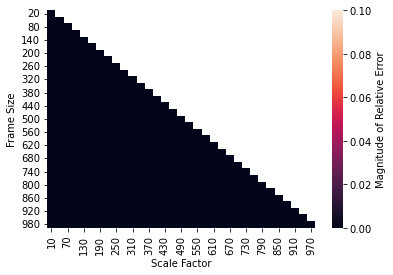

In [24]:
skip = 3
display_01 = h1.pivot("Frame Size", "Scale Factor", "avg_relative_abs_err")
print(display_01.shape)
display_01 = display_01.iloc[::skip]
display_01 = display_01.transpose()
display_01 = display_01.iloc[::skip]
display_01 = display_01.transpose()
print(display_01.shape)
ax = sns.heatmap(display_01, vmin = 0, vmax = 0.1, cbar_kws={'label': 'Magnitude of Relative Error'})

In [77]:
outliers = noise01[noise01["avg_relative_abs_err"] > 300]
print(outliers)

Empty DataFrame
Columns: [frame_size, scale_factor, noise_coefficient, avg_relative_abs_err, Frame Size, Scale Factor]
Index: []


In [78]:
noise05["Frame Size"] = np.absolute(noise05["frame_size"])
noise05["Scale Factor"] = np.absolute(noise05["scale_factor"])
noise05 = noise05[noise05["avg_relative_abs_err"] <= 1]

(87, 14)
(87, 14)


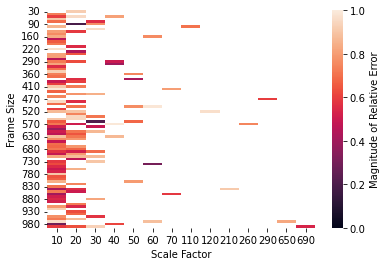

In [79]:
skip = 1
display_05 = noise05.pivot("Frame Size", "Scale Factor", "avg_relative_abs_err")
print(display_05.shape)
display_05 = display_05.iloc[::skip]
display_05 = display_05.transpose()
display_05 = display_05.iloc[::skip]
display_05 = display_05.transpose()
print(display_05.shape)
ax = sns.heatmap(display_05, vmin = 0, vmax = 1, cbar_kws={'label': 'Magnitude of Relative Error'})

In [80]:
display_noise_range = noises[noises["frame_size"]==60]
display_noise_range = display_noise_range[display_noise_range["scale_factor"] == 12]
display_noise_range["Noise Coefficient"] = np.absolute(display_noise_range["noise_coefficient"])
display_noise_range["Error Magnitude"] = np.absolute(display_noise_range["avg_relative_abs_err"])

<AxesSubplot:xlabel='Noise Coefficient', ylabel='Error Magnitude'>

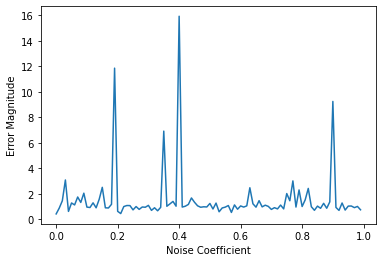

In [81]:
sns.lineplot(data = display_noise_range, x = "Noise Coefficient", y = "Error Magnitude")